
# Regression Learning

- Data preprocessing
- Regression Algorithms
- Feature Selection
- Hyperparametetr optimization

The dataset is about Air Pollution in Skopje - Center - Macedonia

The goal is to predict the PM10 concentration using the weather-meteorological data

The features are explained in Data_Info (some of them are removed)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## 1. Load the Data

In [2]:
# Load the csv:

dataset = pd.read_csv('Centar_PM10-group3.csv')  

# Visualize the data in a data frame:

dataset

,time,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,...,no precip,rain,sleet,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy
0,1/1/15 0:00,30.020000,9.03,0.44,5.03,0.58,0.0,0.0,1033.580000,17.41,...,1,0,0,0,0,0,0,0,0,1
1,1/1/15 1:00,30.210000,4.87,0.44,3.24,0.57,0.0,0.0,1033.860000,15.63,...,1,0,0,0,0,0,0,0,0,1
2,1/1/15 2:00,29.400000,3.62,0.44,3.24,0.62,0.0,0.0,1034.140000,13.80,...,1,0,0,0,0,0,0,0,0,1
3,1/1/15 3:00,28.830000,5.83,0.44,3.24,0.57,0.0,0.0,1034.420000,15.63,...,1,0,0,0,0,0,0,0,0,1
4,1/1/15 4:00,27.690000,5.62,0.44,2.61,0.60,0.0,0.0,1034.990000,14.03,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,12/31/15 19:00,51.040000,19.62,0.00,10.90,0.56,0.0,0.0,1033.170000,24.19,...,1,0,0,0,1,0,0,0,0,0
8756,12/31/15 20:00,59.000000,12.41,0.00,10.41,0.68,0.0,0.0,1033.360000,19.20,...,1,0,0,0,1,0,0,0,0,0
8757,12/31/15 21:00,72.295000,13.36,0.00,8.82,0.58,0.0,0.0,1033.550000,21.45,...,1,0,0,0,1,0,0,0,0,0
8758,12/31/15 22:00,85.590000,15.63,0.00,10.41,0.79,0.0,0.0,1033.416667,15.63,...,1,0,0,0,1,0,0,0,0,0


In [3]:
# Data statistics:

dataset.describe()

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,...,no precip,rain,sleet,snow,Clear,Drizzle,Foggy,Mostly Cloudy,Overcast,Partly Cloudy
count,7352.000000,8759.000000,8760.000000,8759.000000,8759.000000,8737.000000,8737.000000,8618.000000,8759.000000,8759.000000,...,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.0,8760.000000,8760.000000,8760.000000,8760.000000
mean,72.802447,55.270738,0.434668,43.053717,0.665269,0.000174,0.004478,1018.756200,55.927233,5.743029,...,0.978881,0.020776,0.0,0.000342,0.309703,0.0,0.042009,0.200114,0.176712,0.270434
std,82.213323,19.135721,0.387681,12.707508,0.204420,0.001894,0.032476,8.263537,18.350654,1.312911,...,0.143788,0.142643,0.0,0.018504,0.462398,0.0,0.200621,0.400108,0.381447,0.444209
min,0.270000,0.430000,0.000000,-2.210000,0.130000,0.000000,0.000000,986.110000,4.830000,0.031000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,27.627500,39.400000,0.000000,33.580000,0.520000,0.000000,0.000000,1013.137500,40.800000,6.216000,...,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,42.680000,55.780000,0.440000,44.390000,0.700000,0.000000,0.000000,1017.860000,55.780000,6.216000,...,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,77.680000,69.180000,0.750000,54.050000,0.830000,0.000000,0.000000,1023.550833,69.180000,6.216000,...,1.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,815.170000,104.870000,1.000000,69.810000,1.000000,0.097200,0.240000,1041.920000,103.810000,6.216000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


# 2. Data Preprocessing

In [4]:
# General overview of the dataset info:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 8760 non-null   object 
 1   PM10                 7352 non-null   float64
 2   apparentTemperature  8759 non-null   float64
 3   cloudCover           8760 non-null   float64
 4   dewPoint             8759 non-null   float64
 5   humidity             8759 non-null   float64
 6   precipIntensity      8737 non-null   float64
 7   precipProbability    8737 non-null   float64
 8   pressure             8618 non-null   float64
 9   temperature          8759 non-null   float64
 10  visibility           8759 non-null   float64
 11  windBearing          6658 non-null   float64
 12  windSpeed            8759 non-null   float64
 13  no precip            8760 non-null   int64  
 14  rain                 8760 non-null   int64  
 15  sleet                8760 non-null   i

## 2.1 NULL values

Remove rows where the PM10 variable is missing or NULL

- use: data.dropna(axis=0, inplace=True, subset=['PM10'])

In [5]:
# Checking how much instances are missing 'PM10' value:

dataset['PM10'].isnull().sum()

1408

In [6]:
# Dropping the missing values from the column 'PM10' with dropna:

dataset.dropna(axis = 0, inplace = True, subset = ['PM10'])

In [7]:
# Recheck the status with missing values after applying dropna:

dataset['PM10'].isnull().sum()

0

use functions do detect how many values are NULL
 - e.g. data.isnull().sum()

In [8]:
# Checking for Null values in the dataset:

for column in dataset.columns:
    if dataset[column].isnull().values.any():
        print(column)

apparentTemperature
dewPoint
humidity
precipIntensity
precipProbability
pressure
temperature
visibility
windBearing
windSpeed


Fill the feature values that are missing or NULL.
 - e.g., data['pressure'] = data['pressure'].fillna(data['pressure'].mean())

In [9]:
# Filling the feature values that are missing or Null with fillna:

# apparentTemperature:  
dataset['apparentTemperature'] = dataset['apparentTemperature'].fillna(dataset['apparentTemperature'].mean())

# dewPoint:
dataset['dewPoint'] = dataset['dewPoint'].fillna(dataset['dewPoint'].mean())

# humidity:
dataset['humidity'] = dataset['humidity'].fillna(dataset['humidity'].mean())

# precipIntensity:
dataset['precipIntensity'] = dataset['precipIntensity'].fillna(dataset['precipIntensity'].mean())

# precipProbability:
dataset['precipProbability'] = dataset['precipProbability'].fillna(dataset['precipProbability'].mean())

# pressure:
dataset['pressure'] = dataset['pressure'].fillna(dataset['pressure'].mean())

# temperature:
dataset['temperature'] = dataset['temperature'].fillna(dataset['temperature'].mean())

# visibility:
dataset['visibility'] = dataset['visibility'].fillna(dataset['visibility'].mean())

# windBearing:
dataset['windBearing'] = dataset['windBearing'].fillna(dataset['windBearing'].mean())

# windSpeed:
dataset['windSpeed'] = dataset['windSpeed'].fillna(dataset['windSpeed'].mean())

In [10]:
# Rechecking for Null values in the dataset after applying fillna:

dataset.isnull().sum()

time                   0
PM10                   0
apparentTemperature    0
cloudCover             0
dewPoint               0
humidity               0
precipIntensity        0
precipProbability      0
pressure               0
temperature            0
visibility             0
windBearing            0
windSpeed              0
no precip              0
rain                   0
sleet                  0
snow                   0
Clear                  0
Drizzle                0
Foggy                  0
Mostly Cloudy          0
Overcast               0
Partly Cloudy          0
dtype: int64

### Timestamp... 
- do you need it as feature? 
- can you extract some features from the timestamp? - If yes, extract several (hour, day, month)

* data['hour'] = pd.to_datetime(data['time']).dt.hour

Drop the time feature... it is not needed anymore

In [11]:
# Extract hours from the 'time' column:

dataset['hour'] = pd.to_datetime(dataset['time']).dt.hour

In [12]:
# Extract days from the 'time' column:

dataset['day'] = pd.to_datetime(dataset['time']).dt.day

In [13]:
# Extract months from the 'time' column:

dataset['month'] = pd.to_datetime(dataset['time']).dt.month

In [14]:
# Dropping the 'time' column for the dataset:

dataset = dataset.drop(['time'], axis = 1)

In [15]:
# Transforming features: 'hour', 'day', 'month' with sin and cos functions:

# Hour transformation:
dataset['hour_sin'] = np.sin(2*np.pi*dataset.hour/24)
dataset['hour_cos'] = np.cos(2*np.pi*dataset.hour/24)

# Day transformation:
dataset['day_sin'] = np.sin(2*np.pi*dataset.day/365)
dataset['day_cos'] = np.cos(2*np.pi*dataset.day/365)

# Month transformation:
dataset['month_sin'] = np.sin(2*np.pi*dataset.month/12)
dataset['month_cos'] = np.cos(2*np.pi*dataset.month/12)

In [16]:
# Checking the status of the dataset:

dataset.head(5)

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,...,Partly Cloudy,hour,day,month,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,30.02,9.03,0.44,5.03,0.58,0.0,0.0,1033.58,17.41,6.216,...,1,0,1,1,0.000000,1.000000,0.017213,0.999852,0.5,0.866025
1,30.21,4.87,0.44,3.24,0.57,0.0,0.0,1033.86,15.63,6.216,...,1,1,1,1,0.258819,0.965926,0.017213,0.999852,0.5,0.866025
2,29.40,3.62,0.44,3.24,0.62,0.0,0.0,1034.14,13.80,6.216,...,1,2,1,1,0.500000,0.866025,0.017213,0.999852,0.5,0.866025
3,28.83,5.83,0.44,3.24,0.57,0.0,0.0,1034.42,15.63,6.216,...,1,3,1,1,0.707107,0.707107,0.017213,0.999852,0.5,0.866025
4,27.69,5.62,0.44,2.61,0.60,0.0,0.0,1034.99,14.03,6.216,...,1,4,1,1,0.866025,0.500000,0.017213,0.999852,0.5,0.866025


In [17]:
# Analizing the presents of value 0 (zero) in the dataset columns:

for column in dataset.columns:
    if dataset[column].mean() <= 0.5:
        x = dataset[column].value_counts()
        print(x)
        print()
    else:
        print(column, ':   Good', )
        print()

PM10 :   Good

apparentTemperature :   Good

0.00    2401
1.00    1340
0.75    1273
0.19     939
0.44     761
        ... 
0.37       1
0.12       1
0.21       1
0.87       1
0.79       1
Name: cloudCover, Length: 90, dtype: int64

dewPoint :   Good

humidity :   Good

0.000000    7199
0.002400      31
0.004700      31
0.009500      22
0.000153      20
0.007100      15
0.014200      10
0.011800       6
0.016600       4
0.021300       4
0.018900       3
0.033200       2
0.030800       1
0.014300       1
0.003100       1
0.023700       1
0.026100       1
Name: precipIntensity, dtype: int64

0.000000    7199
0.240000     133
0.004354      20
Name: precipProbability, dtype: int64

pressure :   Good

temperature :   Good

visibility :   Good

windBearing :   Good

windSpeed :   Good

no precip :   Good

0    7203
1     149
Name: rain, dtype: int64

0    7352
Name: sleet, dtype: int64

0    7349
1       3
Name: snow, dtype: int64

0    4978
1    2374
Name: Clear, dtype: int64

0    7352
Name

In [18]:
# Dropping the 'sleet', 'Drizzle' columns for the dataset due to the zero value of the columns:

dataset = dataset.drop(['sleet', 'Drizzle'], axis = 1)

In [19]:
# Final check of the dataset:

dataset.head(5)

,PM10,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,...,Partly Cloudy,hour,day,month,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,30.02,9.03,0.44,5.03,0.58,0.0,0.0,1033.58,17.41,6.216,...,1,0,1,1,0.000000,1.000000,0.017213,0.999852,0.5,0.866025
1,30.21,4.87,0.44,3.24,0.57,0.0,0.0,1033.86,15.63,6.216,...,1,1,1,1,0.258819,0.965926,0.017213,0.999852,0.5,0.866025
2,29.40,3.62,0.44,3.24,0.62,0.0,0.0,1034.14,13.80,6.216,...,1,2,1,1,0.500000,0.866025,0.017213,0.999852,0.5,0.866025
3,28.83,5.83,0.44,3.24,0.57,0.0,0.0,1034.42,15.63,6.216,...,1,3,1,1,0.707107,0.707107,0.017213,0.999852,0.5,0.866025
4,27.69,5.62,0.44,2.61,0.60,0.0,0.0,1034.99,14.03,6.216,...,1,4,1,1,0.866025,0.500000,0.017213,0.999852,0.5,0.866025


## 2.2 Standardize the train and test features. Use StandardScaler
<br><b> do not standardize the target variable!

In [20]:
# Creating X and y segments, X contains all the features, y contains the target variable (PM10):

X = dataset.drop(['PM10'], axis = 1)
y = pd.DataFrame(dataset.iloc[:,0])

In [21]:
# Checking the X dataset:

X.head()

,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,windBearing,...,Partly Cloudy,hour,day,month,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,9.03,0.44,5.03,0.58,0.0,0.0,1033.58,17.41,6.216,290.0,...,1,0,1,1,0.000000,1.000000,0.017213,0.999852,0.5,0.866025
1,4.87,0.44,3.24,0.57,0.0,0.0,1033.86,15.63,6.216,311.0,...,1,1,1,1,0.258819,0.965926,0.017213,0.999852,0.5,0.866025
2,3.62,0.44,3.24,0.62,0.0,0.0,1034.14,13.80,6.216,300.0,...,1,2,1,1,0.500000,0.866025,0.017213,0.999852,0.5,0.866025
3,5.83,0.44,3.24,0.57,0.0,0.0,1034.42,15.63,6.216,300.0,...,1,3,1,1,0.707107,0.707107,0.017213,0.999852,0.5,0.866025
4,5.62,0.44,2.61,0.60,0.0,0.0,1034.99,14.03,6.216,330.0,...,1,4,1,1,0.866025,0.500000,0.017213,0.999852,0.5,0.866025


In [22]:
# Checking the y target:

y.head()

,PM10
0,30.02
1,30.21
2,29.40
3,28.83
4,27.69


In [23]:
# We use StandardScaler to standardize the dataset:

from sklearn.preprocessing import StandardScaler

# Here we will avoid to standartize columns: hour, day, month.
columns = ['apparentTemperature', 'cloudCover', 'dewPoint', 'humidity', 'precipIntensity', 'precipProbability', 'pressure', 'temperature',
           'visibility', 'windBearing', 'windSpeed', 'no precip', 'rain', 'snow', 'Clear', 'Foggy', 'Mostly Cloudy', 'Overcast', 'Partly Cloudy']

transformer = StandardScaler()

X[columns] = transformer.fit_transform(X[columns])

In [24]:
# Displying the standardized X dataset:

X.head(5)

,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,windBearing,...,Partly Cloudy,hour,day,month,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,-2.292773,0.051981,-2.889197,-0.384197,-0.107464,-0.136107,1.754999,-1.988818,0.37645,1.345875,...,1.623578,0,1,1,0.000000,1.000000,0.017213,0.999852,0.5,0.866025
1,-2.501684,0.051981,-3.028251,-0.432399,-0.107464,-0.136107,1.788433,-2.082007,0.37645,1.558337,...,1.623578,1,1,1,0.258819,0.965926,0.017213,0.999852,0.5,0.866025
2,-2.564457,0.051981,-3.028251,-0.191390,-0.107464,-0.136107,1.821866,-2.177813,0.37645,1.447047,...,1.623578,2,1,1,0.500000,0.866025,0.017213,0.999852,0.5,0.866025
3,-2.453473,0.051981,-3.028251,-0.432399,-0.107464,-0.136107,1.855299,-2.082007,0.37645,1.447047,...,1.623578,3,1,1,0.707107,0.707107,0.017213,0.999852,0.5,0.866025
4,-2.464019,0.051981,-3.077192,-0.287794,-0.107464,-0.136107,1.923360,-2.165772,0.37645,1.750564,...,1.623578,4,1,1,0.866025,0.500000,0.017213,0.999852,0.5,0.866025


## 2.3 Correlation Matrix

Plot the Correlation Matrix between all the features including the target variable.
 - Which feature is the most correlated with the target variable?
 - Which features are the most correlated between each other?

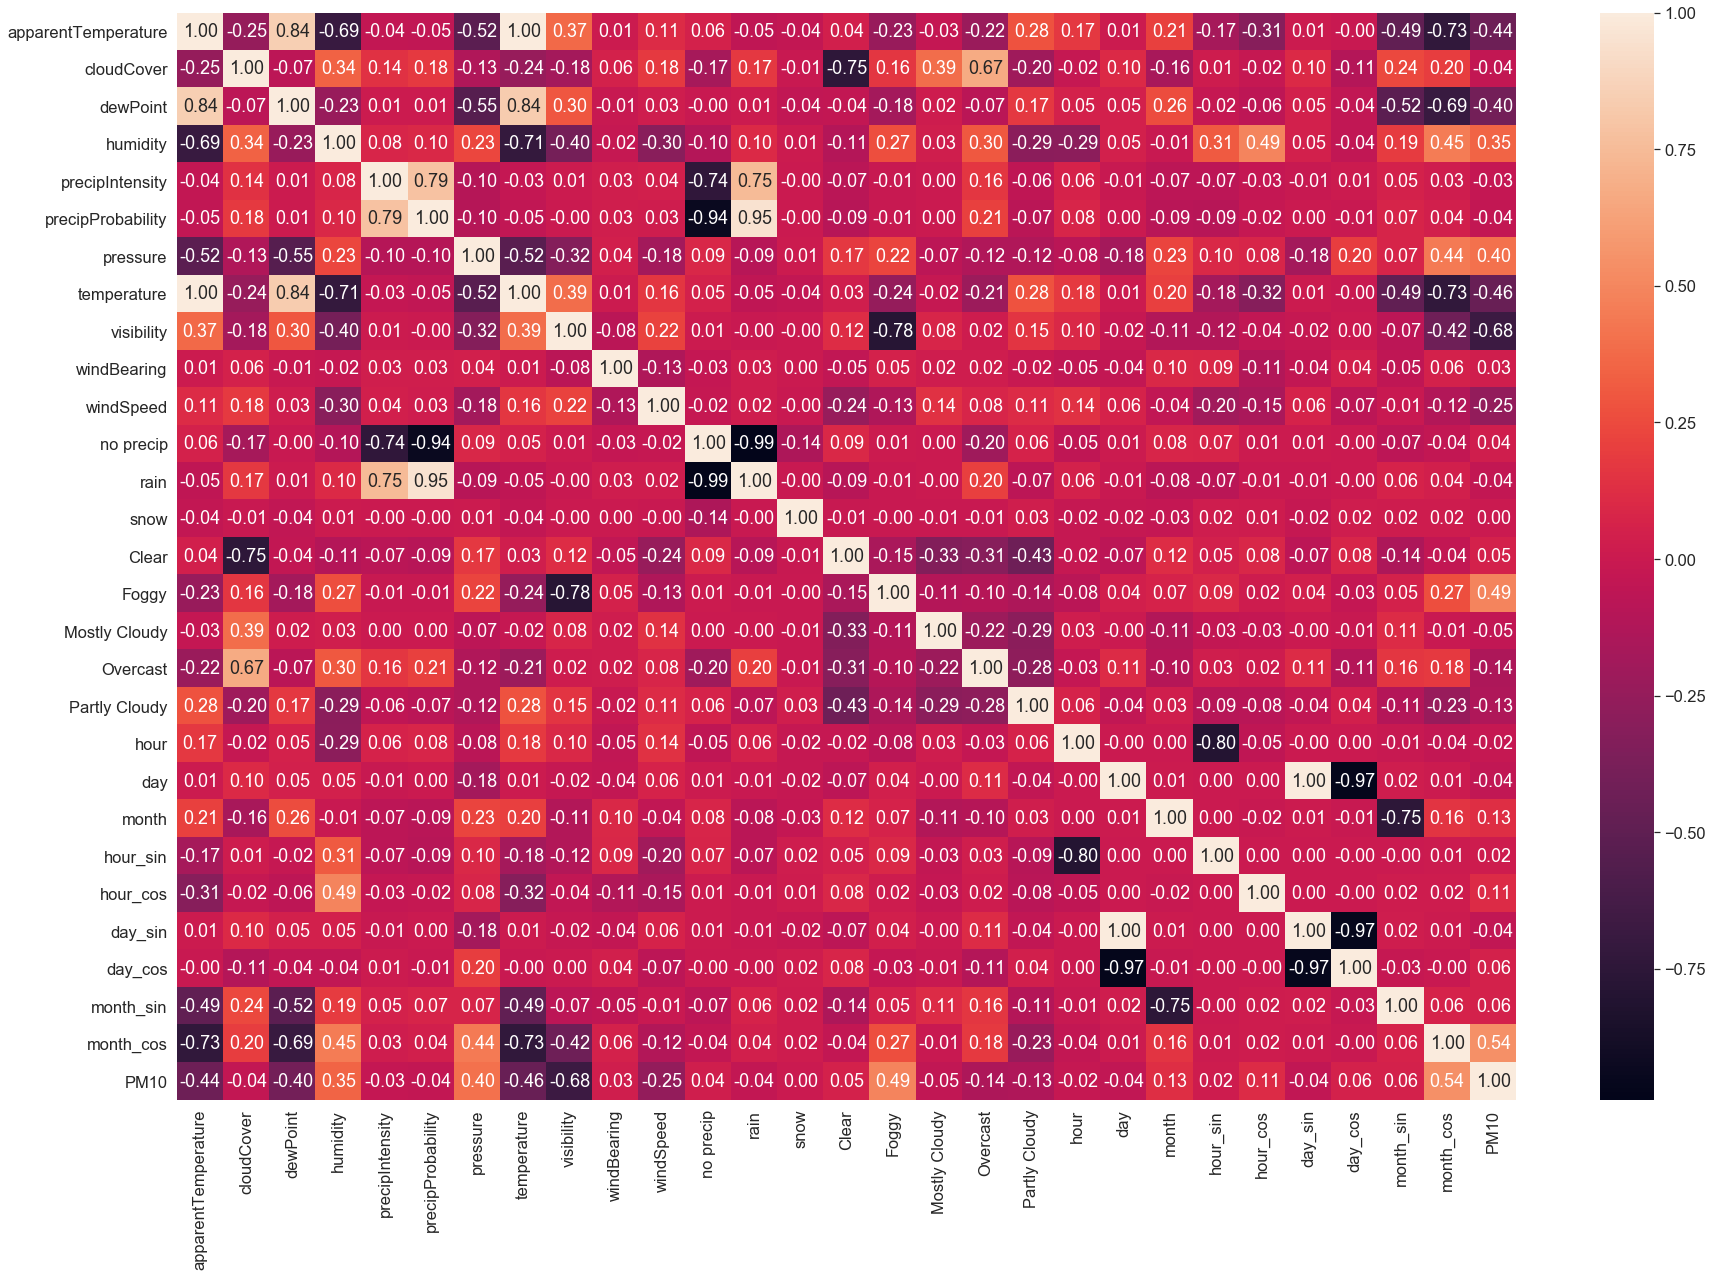

In [25]:
#Correlation Matrix that includes the Target:

result = pd.concat([X, y], axis = 1)
correlation = result.corr()

# Visualizing the correlation:

sns.set(font_scale = 1.5)
plt.figure(figsize = (30, 20))
sns.heatmap(correlation, annot = True, fmt = '.2f')
plt.show()

In [26]:
# Creating dataset_num due to inconvinience with the 'int64' objects:

dataset_num = dataset.select_dtypes(include = ['float64', 'int64'])

# Listing all the correlated values with PM10 above 0.4:

dataset_num_corr = dataset_num.corr()['PM10'][1:] # 1 because the first row is 'PM10'
important_features = dataset_num_corr[abs(dataset_num_corr) > 0.4].sort_values(ascending = True)

print('There is {} strongly correlated values with PM10:\n{}'.format(len(important_features), important_features))

There is 6 strongly correlated values with PM10:
visibility            -0.675735
temperature           -0.458540
apparentTemperature   -0.436157
pressure               0.403260
Foggy                  0.493524
month_cos              0.544834
Name: PM10, dtype: float64


### Summary on Correlation Matrix:

1) Which feature is the most correlated with the target variable?

- The most correlated feature with the target variable is 'visibility' and their correlation is negative, (which means when
   visibility decreases the PM10 increases).


2) Which features are the most correlated between each other?

- The most two correlated features between each other are: 'no precip' and 'rain', but again with negative correlation (which means that both of them 
    are explaining opposite weather condition). Also, features 'no precip' and 'precip Probability' are extremely correlated as well.

## 2.4 Split the data 

Set the random_state=1

In [27]:
# Spliting the dataset into train and test, where 70% is train and 30%  is test with shuffling:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, shuffle = True)

In [28]:
# X_train shape:

X_train.shape

(5146, 28)

In [29]:
# X_test shape:

X_test.shape

(2206, 28)

In [30]:
# y_train shape:

y_train.shape

(5146, 1)

In [31]:
# y_test shape:

y_test.shape

(2206, 1)

## 3 Default Regressor

Create regressors with default parameters:
- Linear Regression
- LASSO regression
- Random Forest
- SVR
- KNN
- Dummy regressor

Compare the MAE values in a table

In [32]:
# Importing libraries:

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [33]:
# All in one procedure of: Building model, Training, Predictions:

# Linear Regression model, train, predict:
lin = linear_model.LinearRegression()
lin.fit(X_train, y_train)
y_pred = lin.predict(X_test)

# Lasso Regression model, train, predict:
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# RandomForest model, train, predict:
rf = RandomForestRegressor(random_state = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# SVR model, train, predict:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# KNN model, train, predict:
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)

# Dummy Regressor model, train, predict:
dummy= DummyRegressor(strategy = "mean")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

In [34]:
# Calculating the metrics of the build models:

# Linear Regression model metrics:
mae1 = mean_absolute_error(y_test, y_pred)
mse1 = mean_squared_error(y_test, y_pred)
rmse1 = np.sqrt(mean_squared_error(y_test, y_pred))
r21 = r2_score(y_test, y_pred)

# Lasso Regression model metrics:
mae2 = mean_absolute_error(y_test, y_pred_lasso)
mse2 = mean_squared_error(y_test, y_pred_lasso)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r22 = r2_score(y_test, y_pred_lasso)

# RandomForest model metrics:
mae3 = mean_absolute_error(y_test, y_pred_rf)
mse3 = mean_squared_error(y_test, y_pred_rf)
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r23 = r2_score(y_test, y_pred_rf)

# SVR model metrics:
mae4 = mean_absolute_error(y_test, y_pred_svr)
mse4 = mean_squared_error(y_test, y_pred_svr)
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r24 = r2_score(y_test, y_pred_svr)

# KNN model metrics:
mae5 = mean_absolute_error(y_test, y_pred_knr)
mse5 = mean_squared_error(y_test, y_pred_knr)
rmse5 = np.sqrt(mean_squared_error(y_test, y_pred_knr))
r25 = r2_score(y_test, y_pred_knr)

# Dummy Regressor model metrics:
mae6 = mean_absolute_error(y_test, y_pred_dummy)
mse6 = mean_squared_error(y_test, y_pred_dummy)
rmse6 = np.sqrt(mean_squared_error(y_test, y_pred_dummy))
r26 = r2_score(y_test, y_pred_dummy)

In [35]:
# Constructing the comparison tabel:

data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Linear Regression': [mae1, mse1, rmse1, r21],
        'LASSO Regression': [mae2, mse2, rmse2, r22],
        'Random Forest': [mae3, mse3, rmse3, r23],
        'SVR': [mae4, mse4, rmse4, r24],
        'KNN': [mae5, mse5, rmse5, r25],
        'Dummy': [mae6, mse6, rmse6, r26],
        }

Comparison1 = pd.DataFrame(data, columns = ['Metric', 'Linear Regression', 'LASSO Regression', 'Random Forest', 'SVR', 'KNN', 'Dummy'])

Comparison1

,Metric,Linear Regression,LASSO Regression,Random Forest,SVR,KNN,Dummy
0,MAE,31.908488,31.742879,16.877306,39.018108,22.656082,54.804403
1,MSE,2451.833924,2515.873123,925.933521,5578.623226,1683.977797,6532.782034
2,RMSE,49.515997,50.158480,30.429156,74.690182,41.036299,80.825627
3,R2,0.624659,0.614856,0.858253,0.145993,0.742207,-0.000075


[Text(0, 0.5, 'Predicted'), Text(0.5, 0, 'Actual')]

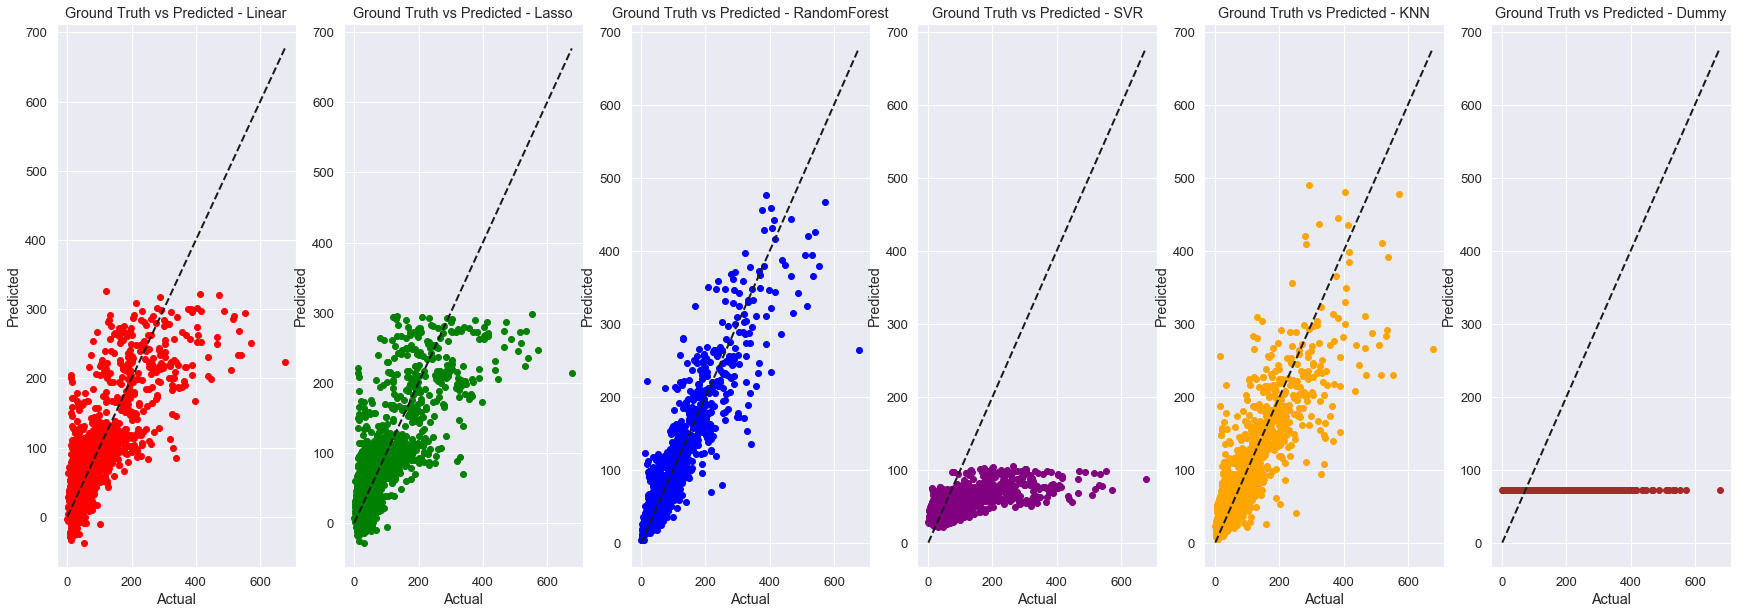

In [36]:
# Visualizing the Predictions/Errors:

sns.set(font_scale = 1.2)
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize = (30, 10))

# Linear Regression:
ax1.scatter(y_test, y_pred, color = 'red')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax1.set_title('Ground Truth vs Predicted - Linear')
ax1.set(xlabel = 'Actual', ylabel = 'Predicted')

# Lasso Regression:
ax2.scatter(y_test, y_pred_lasso, color = 'green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax2.set_title('Ground Truth vs Predicted - Lasso')
ax2.set(xlabel = 'Actual', ylabel = 'Predicted')

# RandomForest:
ax3.scatter(y_test, y_pred_rf, color = 'blue')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax3.set_title('Ground Truth vs Predicted - RandomForest')
ax3.set(xlabel = 'Actual', ylabel = 'Predicted')

# SVR:
ax4.scatter(y_test, y_pred_svr, color = 'purple')
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax4.set_title('Ground Truth vs Predicted - SVR')
ax4.set(xlabel = 'Actual', ylabel = 'Predicted')

# KNN:
ax5.scatter(y_test, y_pred_knr, color = 'orange')
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax5.set_title('Ground Truth vs Predicted - KNN')
ax5.set(xlabel = 'Actual', ylabel = 'Predicted')

# Dummy Regressor:
ax6.scatter(y_test, y_pred_dummy, color = 'brown')
ax6.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax6.set_title('Ground Truth vs Predicted - Dummy')
ax6.set(xlabel = 'Actual', ylabel = 'Predicted')

## 3. Feature Selection

Use SelectKBest feature selection technique.
Reduce the number of features to 15

In [37]:
# Importing libraries:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import set_printoptions

In [38]:
# Feature selection with Univariate Statistical Tests:

# Feature selection, top 15 features:
select = SelectKBest(score_func = f_regression, k = 15)
feature = select.fit(X_train, y_train)

# Summarize the scores:
set_printoptions(precision = 3)
print(feature.scores_)

# Construct the X_new:
X_new = feature.transform(X_train)

# Empty print() just to separate the two information tables:
print()

#Summarize the selected features:
print(X_new[0:5])

[1.147e+03 7.436e+00 9.265e+02 7.053e+02 6.914e+00 7.572e+00 9.674e+02
 1.304e+03 4.296e+03 4.808e+00 3.603e+02 5.886e+00 6.686e+00 2.040e+00
 1.204e+01 1.668e+03 1.375e+01 9.813e+01 8.122e+01 1.766e+00 9.301e+00
 7.382e+01 5.819e-01 6.992e+01 8.762e+00 1.550e+01 1.793e+01 2.125e+03]

[[ 1.216e+00  2.376e-01 -1.686e+00 -7.871e-01  1.230e+00  3.765e-01
  -2.715e-01 -2.205e-01 -4.509e-01  1.624e+00  5.000e+00 -5.000e-01
   9.987e-01  5.000e-01 -8.660e-01]
 [-5.949e-01 -6.332e-01  2.424e-01 -7.294e-01 -6.575e-01  3.765e-01
  -2.715e-01 -2.205e-01  2.218e+00 -6.159e-01  1.100e+01 -5.000e-01
   8.861e-01 -5.000e-01  8.660e-01]
 [ 1.020e+00 -9.490e-02 -1.782e+00 -1.153e-01  1.026e+00  3.765e-01
   2.036e+00 -2.205e-01 -4.509e-01  1.624e+00  6.000e+00 -8.660e-01
   9.088e-01  1.225e-16 -1.000e+00]
 [-6.069e-01 -9.490e-02  1.351e+00  2.601e-02 -6.700e-01 -9.940e-01
  -9.405e-01 -2.205e-01  2.218e+00 -6.159e-01  3.000e+00  6.123e-17
   9.226e-01  1.000e+00  6.123e-17]
 [-9.404e-01 -7.801e-01  9

In [39]:
# Display the feature names:

cols = select.get_support(indices = True)
X_new = X_train.iloc[: ,cols]

print('Selected columns are: ', cols)

X_new

Selected columns are:  [ 0  2  3  6  7  8 10 15 17 18 21 23 25 26 27]


,apparentTemperature,dewPoint,humidity,pressure,temperature,visibility,windSpeed,Foggy,Overcast,Partly Cloudy,month,hour_cos,day_cos,month_sin,month_cos
2944,1.215524,0.237592,-1.685643,-0.787138,1.229851,0.376450,-0.271480,-0.22054,-0.450858,1.623578,5,-5.000000e-01,0.998667,5.000000e-01,-8.660254e-01
7960,-0.594870,-0.633248,0.242425,-0.729425,-0.657479,0.376450,-0.271480,-0.22054,2.217991,-0.615924,11,-5.000000e-01,0.886071,-5.000000e-01,8.660254e-01
4214,1.019670,-0.094896,-1.782046,-0.115284,1.025674,0.376450,2.036123,-0.22054,-0.450858,1.623578,6,-8.660254e-01,0.908818,1.224647e-16,-1.000000e+00
1950,-0.606922,-0.094896,1.351064,0.026012,-0.670043,-0.994014,-0.940502,-0.22054,2.217991,-0.615924,3,6.123234e-17,0.922640,1.000000e+00,6.123234e-17
2111,-0.940376,-0.780071,0.965450,-0.605244,-1.017668,0.376450,-0.271480,-0.22054,-0.450858,-0.615924,3,9.659258e-01,0.877960,1.000000e+00,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,-1.324049,-1.183252,0.338828,-0.026128,-1.079445,0.376450,1.110991,-0.22054,2.217991,-0.615924,2,9.659258e-01,0.992749,8.660254e-01,5.000000e-01
5862,0.703290,0.900239,-0.335996,-0.708330,0.695850,0.376450,-0.355108,-0.22054,-0.450858,-0.615924,9,6.123234e-17,0.999407,-1.000000e+00,-1.836970e-16
4473,1.472645,1.163588,-1.251828,-0.055184,1.497899,0.376450,-0.355108,-0.22054,-0.450858,1.623578,7,-7.071068e-01,0.994671,-5.000000e-01,-8.660254e-01
235,-1.019722,-0.993702,0.772643,0.186413,-1.100386,-2.585072,-0.493616,-0.22054,-0.450858,1.623578,1,2.588190e-01,0.985220,5.000000e-01,8.660254e-01


Create new regressors with default parameters with the selected 15 features:
- Linear Regression
- LASSO regression
- Random Forest
- SVR
- KNN
- Dummy regressor

Compare the MAE values in a table

In [40]:
# All in one procedure for Best 15 Features of: Building model, Training, Predictions:

# Linear Regression model, train, predict:
lin = linear_model.LinearRegression()
lin.fit(X_new, y_train)
y_pred_b = lin.predict(feature.transform(X_test))

# Lasso Regression model, train, predict:
lasso = linear_model.Lasso()
lasso.fit(X_new, y_train)
y_pred_lasso_b = lasso.predict(feature.transform(X_test))

# RandomForest model, train, predict:
rf = RandomForestRegressor(random_state = 1)
rf.fit(X_new, y_train)
y_pred_rf_b = rf.predict(feature.transform(X_test))

# SVR model, train, predict:
svr = SVR()
svr.fit(X_new, y_train)
y_pred_svr_b = svr.predict(feature.transform(X_test))

# KNN model, train, predict:
knr = KNeighborsRegressor()
knr.fit(X_new, y_train)
y_pred_knr_b = knr.predict(feature.transform(X_test))

# Dummy Regressor model, train, predict:
dummy= DummyRegressor(strategy = "mean")
dummy.fit(X_new, y_train)
y_pred_dummy_b = dummy.predict(feature.transform(X_test))

In [41]:
# Calculating the metrics for Best 15 Features of the build models:

# Linear Regression model metrics:
mae7 = mean_absolute_error(y_test, y_pred_b)
mse7 = mean_squared_error(y_test, y_pred_b)
rmse7 = np.sqrt(mean_squared_error(y_test, y_pred_b))
r27 = r2_score(y_test, y_pred_b)

# Lasso Regression model metrics:
mae8 = mean_absolute_error(y_test, y_pred_lasso_b)
mse8 = mean_squared_error(y_test, y_pred_lasso_b)
rmse8 = np.sqrt(mean_squared_error(y_test, y_pred_lasso_b))
r28 = r2_score(y_test, y_pred_lasso_b)

# RandomForest model metrics:
mae9 = mean_absolute_error(y_test, y_pred_rf_b)
mse9 = mean_squared_error(y_test, y_pred_rf_b)
rmse9 = np.sqrt(mean_squared_error(y_test, y_pred_rf_b))
r29 = r2_score(y_test, y_pred_rf_b)

# SVR model metrics:
mae10 = mean_absolute_error(y_test, y_pred_svr_b)
mse10 = mean_squared_error(y_test, y_pred_svr_b)
rmse10 = np.sqrt(mean_squared_error(y_test, y_pred_svr_b))
r210 = r2_score(y_test, y_pred_svr_b)

# KNN model metrics:
mae11 = mean_absolute_error(y_test, y_pred_knr_b)
mse11 = mean_squared_error(y_test, y_pred_knr_b)
rmse11 = np.sqrt(mean_squared_error(y_test, y_pred_knr_b))
r211 = r2_score(y_test, y_pred_knr_b)

# Dummy Regressor model metrics:
mae12 = mean_absolute_error(y_test, y_pred_dummy_b)
mse12 = mean_squared_error(y_test, y_pred_dummy_b)
rmse12 = np.sqrt(mean_squared_error(y_test, y_pred_dummy_b))
r212 = r2_score(y_test, y_pred_dummy_b)

In [42]:
# Constructing the comparison tabel for Best 15 Features:

data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Linear Regression': [mae7, mse7, rmse7, r27],
        'LASSO Regression': [mae8, mse8, rmse8, r28],
        'Random Forest': [mae9, mse9, rmse9, r29],
        'SVR': [mae10, mse10, rmse10, r210],
        'KNN': [mae11, mse11, rmse11, r211],
        'Dummy': [mae12, mse12, rmse12, r212],
        }

Comparison2 = pd.DataFrame(data, columns = ['Metric', 'Linear Regression', 'LASSO Regression', 'Random Forest', 'SVR', 'KNN', 'Dummy'])

Comparison2

,Metric,Linear Regression,LASSO Regression,Random Forest,SVR,KNN,Dummy
0,MAE,31.817852,31.848809,16.620309,31.958199,20.928172,54.804403
1,MSE,2527.318374,2591.641719,922.216103,3562.479157,1352.706296,6532.782034
2,RMSE,50.272441,50.908169,30.368011,59.686507,36.779156,80.825627
3,R2,0.613104,0.603257,0.858822,0.454636,0.792920,-0.000075


[Text(0, 0.5, 'Predicted'), Text(0.5, 0, 'Actual')]

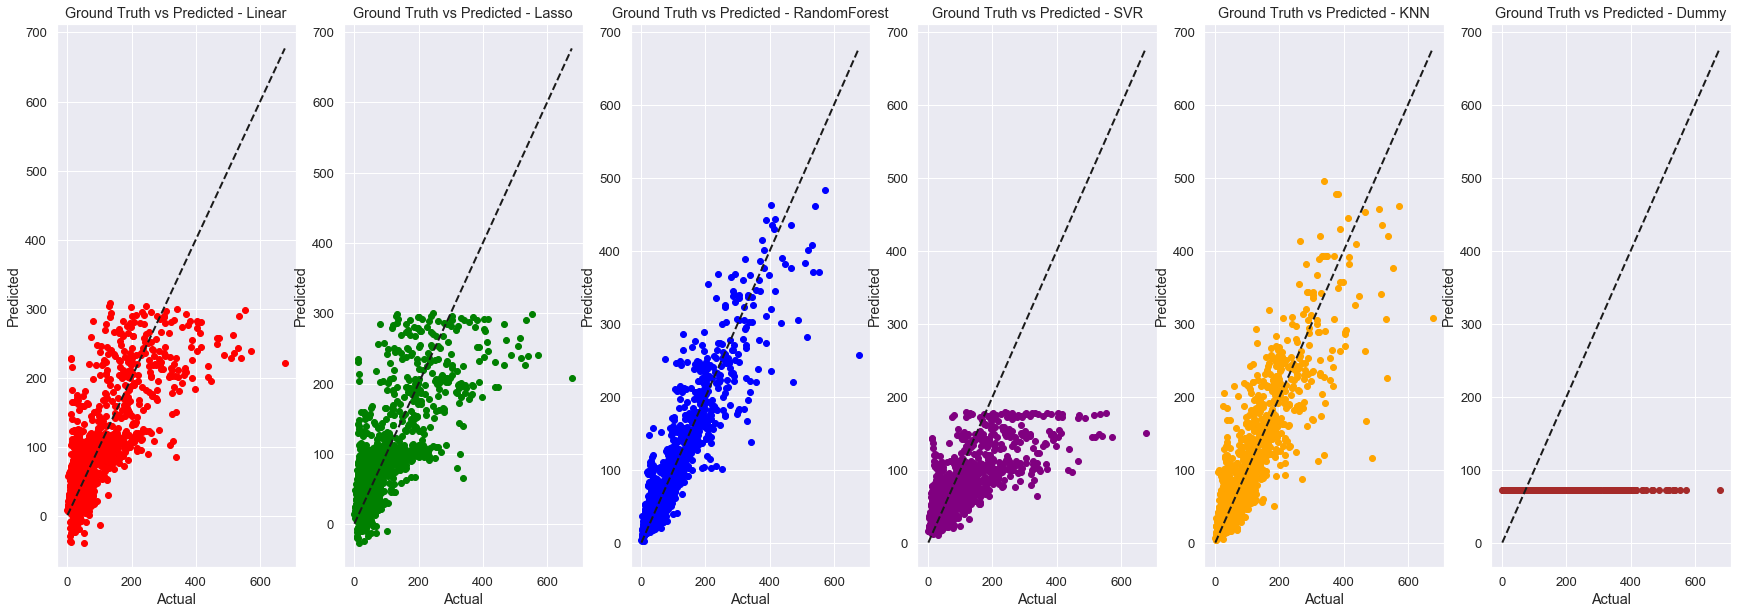

In [43]:
# Visualizing the Predictions/Errors for Best 15 Features:

sns.set(font_scale = 1.2)
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize = (30, 10))

# Linear Regression:
ax1.scatter(y_test, y_pred_b, color = 'red')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax1.set_title('Ground Truth vs Predicted - Linear')
ax1.set(xlabel = 'Actual', ylabel = 'Predicted')

# Lasso Regression:
ax2.scatter(y_test, y_pred_lasso_b, color = 'green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax2.set_title('Ground Truth vs Predicted - Lasso')
ax2.set(xlabel = 'Actual', ylabel = 'Predicted')

# RandomForest:
ax3.scatter(y_test, y_pred_rf_b, color = 'blue')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax3.set_title('Ground Truth vs Predicted - RandomForest')
ax3.set(xlabel = 'Actual', ylabel = 'Predicted')

# SVR:
ax4.scatter(y_test, y_pred_svr_b, color = 'purple')
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax4.set_title('Ground Truth vs Predicted - SVR')
ax4.set(xlabel = 'Actual', ylabel = 'Predicted')

# KNN:
ax5.scatter(y_test, y_pred_knr_b, color = 'orange')
ax5.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax5.set_title('Ground Truth vs Predicted - KNN')
ax5.set(xlabel = 'Actual', ylabel = 'Predicted')

# Dummy Regressor:
ax6.scatter(y_test, y_pred_dummy_b, color = 'brown')
ax6.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax6.set_title('Ground Truth vs Predicted - Dummy')
ax6.set(xlabel = 'Actual', ylabel = 'Predicted')

Compare the MAE values in a table:

In [44]:
# Constructing the comparison tabel between 'Default models' and 'Best 15 Features models':

data = {'Metric':  ['MAE Default', 'MAE Best 15'],
        'Linear Regression': [mae1, mae7],
        'LASSO Regression' : [mae2, mae8],
        'Random Forest' : [mae3, mae9],
        'SVR': [mae4, mae10],
        'KNN': [mae5, mae11],
        'Dummy': [mae6, mae12],
        }

Comparison3 = pd.DataFrame(data, columns = ['Metric', 'Linear Regression', 'LASSO Regression', 'Random Forest', 'SVR', 'KNN', 'Dummy'])

Comparison3

,Metric,Linear Regression,LASSO Regression,Random Forest,SVR,KNN,Dummy
0,MAE Default,31.908488,31.742879,16.877306,39.018108,22.656082,54.804403
1,MAE Best 15,31.817852,31.848809,16.620309,31.958199,20.928172,54.804403


Compare the the two tables (all features vs top15 features).
Discuss the results

### Summary on MAE results for 'MAE Default' and 'MAE Best 15':
    
- First, we can see that between the first and the third regressor there is not much improvements in the results. However, that is not
    the case, actually we got the same or even slightly better results with 10 features less which means better performance of 
    our models.

    
- Second, our forth and fifth models, which are 'SVR' and 'KNN', we have cosiderable improvment especially with SVR model. 

    - Now, with 'SVR' we have substancional improvement, which we will try to explained generally. The aim of feature selection is to 
    select the most useful feature set in order to establish a good predictor for the concerned learning algorithm. The irrelevant and 
    unimportant features are discarded in order to reduce the dimensionality. Here, we managed to perform good selection that gave as 
    that adventage. What we have is better dataset that contains fruitful features that improve the accuracy od the developed model.
    
    - On the other hand, with 'KNN' we have model that calculates distance and if we have features that are classified as bad it means
    that they will affect the overall distance, hance lower accuracy. Once again we managed to create better dataset that contributes 
    to the nature of the 'KNN' model.

    
- Finally, we always need to strive to make smaller dataset on dimensionality but densely packed with prolific information that can 
    yield higher accuracy, hance encapsulating better solution for our problem at hand.

## 4. Hyperparameter Optimization

Use the dataset with the selected 15 features.

### 4.1 Random Search
Use Random Search CV to optimize the parameters for:
- LASSO regression
- Random Forest
- SVR

Use appropriate  n_iter, so that it ends in a reasonable time
 <br>Use CV = 3

Use Cross Validation for optimization, and the test set for final evaluation
<br> <b>DO NOT OPTIMIZE ON THE TEST SET </b>

Show the 2 comparison tables: 
- on the CV  
- on the test set

In [45]:
# Importing libraries:

from sklearn.model_selection import KFold
np.random.seed(seed = 1)
from sklearn.model_selection import RandomizedSearchCV

### LASSO Regression:

In [46]:
# Creating procedure for Best 15 Features, building model and Training with Cross Validation to Optimize Parameters:

# Creating the validation object:
kf = KFold(n_splits = 3, shuffle = True)

# Create the space of hyperparameter values:
alpha = [0.1, 0.2, 0.5, 0.8, 1, 1.5]
fit_intercept = [True, False]
precompute = [True, False]
warm_start = [True, False]
positive = [True, False]
selection = ['cyclic', 'random']

# Packing the hyperparameter values in variable:
random_search = {'alpha': alpha,
               'fit_intercept': fit_intercept,
               'precompute': precompute,
               'warm_start': warm_start,
               'positive': positive,
               'selection': selection}

# Building LASSO Regressor:
lasso = linear_model.Lasso()

# Create the RandomSearch model and train:
model_l = RandomizedSearchCV(estimator = lasso, 
                           param_distributions = random_search, 
                           n_iter = 100, 
                           cv = kf, 
                           verbose = 1, 
                           random_state = 1, 
                           n_jobs = -1,
                           scoring = 'neg_mean_absolute_error')

# Training the created model:
model_l.fit(X_new, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
                   estimator=Lasso(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.1, 0.2, 0.5, 0.8, 1, 1.5],
                                        'fit_intercept': [True, False],
                                        'positive': [True, False],
                                        'precompute': [True, False],
                                        'selection': ['cyclic', 'random'],
                                        'warm_start': [True, False]},
                   random_state=1, scoring='neg_mean_absolute_error',
                   verbose=1)

In [47]:
# Checking the model best parameters:

model_l.best_params_

{'warm_start': False,
 'selection': 'cyclic',
 'precompute': False,
 'positive': False,
 'fit_intercept': False,
 'alpha': 0.1}

In [48]:
# Extracting the model Cross Validation MAE result:

result_l = (model_l.best_score_)*(-1)

In [49]:
# Predicting with the best estimator on the test set:

y_pred_l_hy = model_l.best_estimator_.predict(feature.transform(X_test))

In [50]:
# Calculating the metrics of Lasso_Hyper_Random:

mae13 = mean_absolute_error(y_test, y_pred_l_hy)
mse13 = mean_squared_error(y_test, y_pred_l_hy)
rmse13 = np.sqrt(mean_squared_error(y_test, y_pred_l_hy))
r213 = r2_score(y_test, y_pred_l_hy)

In [51]:
# Constructing the comparison tabel:

data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'Lasso_Hyper_Random': [mae13, mse13, rmse13, r213],
        }

Comparison4 = pd.DataFrame (data, columns = ['Metric','Lasso_Hyper_Random'])

Comparison4

,Metric,Lasso_Hyper_Random
0,MAE,31.620077
1,MSE,2523.644005
2,RMSE,50.235884
3,R2,0.613666


### Random Forest:

In [52]:
# Creating procedure for Best 15 Features, building model and Training with Cross Validation to Optimize Parameters:

# Creating the validation object:
kf = KFold(n_splits = 3, shuffle = True)

# Create the space of hyperparameter values:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]
max_features = ['auto', 10, 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

# Packing the hyperparameter values in variable:
random_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Building RandomForest Regressor:
clf = RandomForestRegressor()

# Create the RandomSearch model and train:
model_rf = RandomizedSearchCV(estimator = clf, 
                           param_distributions = random_search, 
                           n_iter = 100, 
                           cv = kf, 
                           verbose = 1, 
                           random_state = 1, 
                           n_jobs = -1,
                           scoring = 'neg_mean_absolute_error')

# Training the created model:
model_rf.fit(X_new, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
                   estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 10, 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 118, 136, 155,
                                                         173, 191, 210, 228,
                                                         246, 265, 283, 302,
                                            

In [53]:
# Checking the model best parameters:

model_rf.best_params_

{'n_estimators': 834,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 10,
 'max_depth': 100,
 'bootstrap': False}

In [54]:
# Extracting the model Cross Validation MAE result:

result_rf = (model_rf.best_score_)*(-1)

In [55]:
# Predicting with the best estimator on the test set:

y_pred_rf_hy = model_rf.best_estimator_.predict(feature.transform(X_test))

In [56]:
# Calculating the metrics of RF_Hyper_Random:

mae14 = mean_absolute_error(y_test, y_pred_rf_hy)
mse14 = mean_squared_error(y_test, y_pred_rf_hy)
rmse14 = np.sqrt(mean_squared_error(y_test, y_pred_rf_hy))
r214 = r2_score(y_test, y_pred_rf_hy)

In [57]:
# Constructing the comparison tabel:

data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'RF_Hyper_Random': [mae14, mse14, rmse14, r214],
        }

Comparison5 = pd.DataFrame (data, columns = ['Metric','RF_Hyper_Random'])

Comparison5

,Metric,RF_Hyper_Random
0,MAE,15.232940
1,MSE,899.622194
2,RMSE,29.993703
3,R2,0.862281


### SVR:

In [58]:
# Creating procedure for Best 15 Features, building model and Training with Cross Validation to Optimize Parameters:

# Creating the validation object:
kf = KFold(n_splits = 3, shuffle = True)

# Create the space of hyperparameter values:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [2, 3]
gamma = ['scale', 'auto']
C = [1, 10, 100]
epsilon = [0.1, 0.2, 0.3]
shrinking = [True, False]

# Packing the hyperparameter values in variable:
random_search = {'kernel': kernel,
               'degree': degree,
               'gamma': gamma,
               'C': C,
               'epsilon': epsilon,
               'shrinking': shrinking}

# Building SV Regressor:
svr = SVR()

# Create the RandomSearch model and train:
model_sv = RandomizedSearchCV(estimator = svr, 
                           param_distributions = random_search, 
                           n_iter = 50, 
                           cv = kf, 
                           verbose = 1, 
                           random_state = 1, 
                           n_jobs = -1,
                           scoring = 'neg_mean_absolute_error')

# Training the created model:
model_sv.fit(X_new, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
                   estimator=SVR(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100], 'degree': [2, 3],
                                        'epsilon': [0.1, 0.2, 0.3],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   random_state=1, scoring='neg_mean_absolute_error',
                   verbose=1)

In [59]:
# Checking the model best parameters:

model_sv.best_params_

{'shrinking': False,
 'kernel': 'poly',
 'gamma': 'auto',
 'epsilon': 0.2,
 'degree': 3,
 'C': 10}

In [60]:
# Extracting the model Cross Validation MAE result:

result_sv = (model_sv.best_score_)*(-1)

In [61]:
# Predicting with the best estimator on the test set:

y_pred_sv_hy = model_sv.best_estimator_.predict(feature.transform(X_test))

In [62]:
# Calculating the metrics of SV_Hyper_Random:

mae15 = mean_absolute_error(y_test, y_pred_sv_hy)
mse15 = mean_squared_error(y_test, y_pred_sv_hy)
rmse15 = np.sqrt(mean_squared_error(y_test, y_pred_sv_hy))
r215 = r2_score(y_test, y_pred_sv_hy)

In [63]:
# Constructing the comparison tabel:

data = {'Metric':  ['MAE', 'MSE','RMSE','R2'],
        'SV_Hyper_Random': [mae15, mse15, rmse15, r215],
        }

Comparison6 = pd.DataFrame (data, columns = ['Metric','SV_Hyper_Random'])

Comparison6

,Metric,SV_Hyper_Random
0,MAE,24.076261
1,MSE,1746.583920
2,RMSE,41.792151
3,R2,0.732623


#### - Finalizing with comparison table that give clear picture of MAE on CV and Test set:

In [64]:
# Cross Validation table, MAE results:

data = {'Metric':  ['MAE CV', 'MAE Test Set'],
        'LASSO Regression' : [result_l, mae13],
        'Random Forest' : [result_rf, mae14],
        'SVR' : [result_sv, mae15],
        }

Comparison7 = pd.DataFrame(data, columns = ['Metric', 'LASSO Regression', 'Random Forest', 'SVR'])

Comparison7

,Metric,LASSO Regression,Random Forest,SVR
0,MAE CV,32.283362,17.611028,24.713601
1,MAE Test Set,31.620077,15.232940,24.076261


## 5. SUMMARY

Visualize the errors (actual vs predicted) for the best 3 regressor

In [65]:
# Constructing the comparison tabel between 'Default models', 'Best 15 Features models' and 'Hyper Opt models' for choosing,
# the best 3 regressors:

data = {'Metric':  ['MAE Default', 'MAE Best 15', 'MAE Hyper Opt'],
        'Linear Regression': [mae1, mae7, np.nan],
        'LASSO Regression' : [mae2, mae8, mae13],
        'Random Forest' : [mae3, mae9, mae14],
        'SVR': [mae4, mae10, mae15],
        'KNN': [mae5, mae11, np.nan],
        'Dummy': [mae6, mae12, np.nan],
        }

Comparison8 = pd.DataFrame(data, columns = ['Metric', 'Linear Regression', 'LASSO Regression', 'Random Forest', 'SVR', 'KNN', 'Dummy'])

Comparison8

,Metric,Linear Regression,LASSO Regression,Random Forest,SVR,KNN,Dummy
0,MAE Default,31.908488,31.742879,16.877306,39.018108,22.656082,54.804403
1,MAE Best 15,31.817852,31.848809,16.620309,31.958199,20.928172,54.804403
2,MAE Hyper Opt,NaN,31.620077,15.232940,24.076261,NaN,NaN


[Text(0, 0.5, 'Predicted'), Text(0.5, 0, 'Actual')]

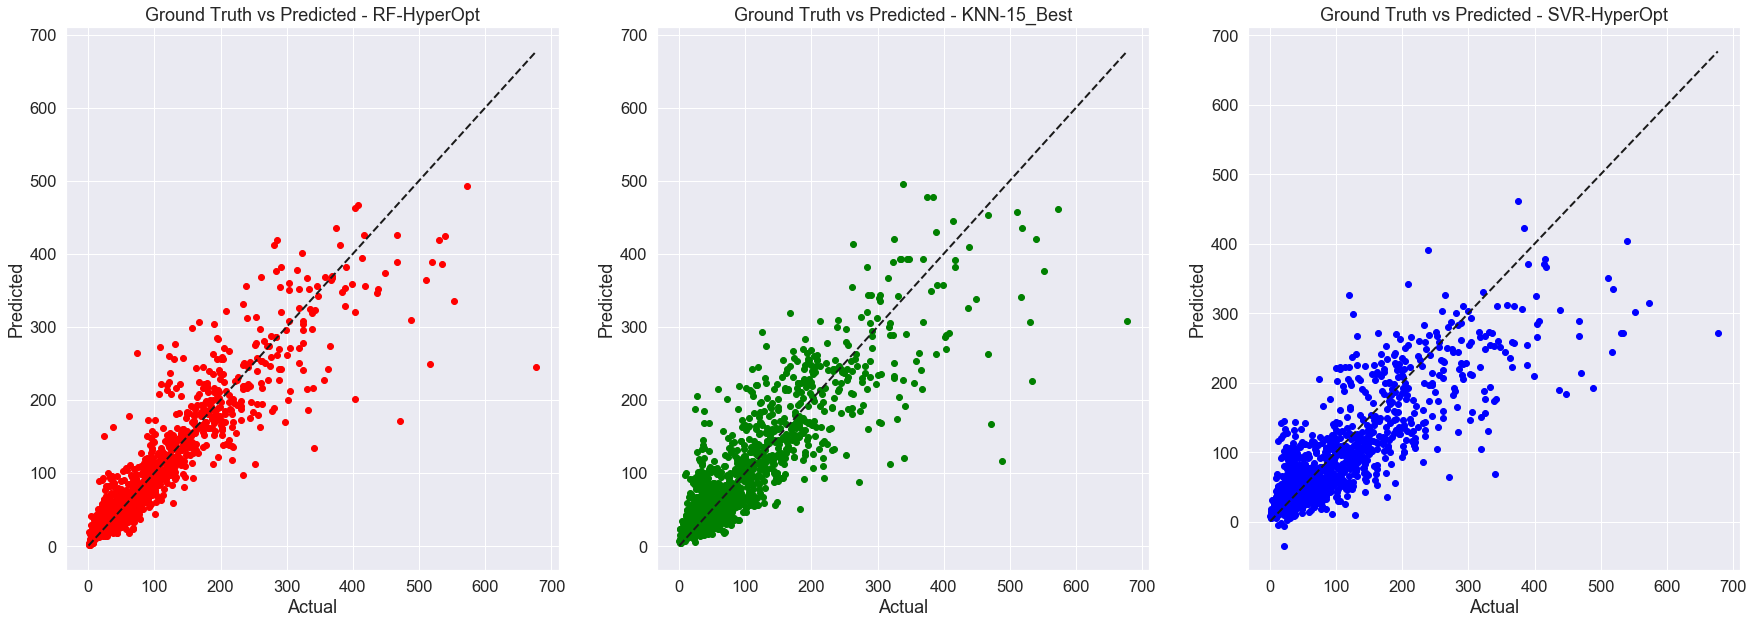

In [66]:
# Visualizing the Predictions/Errors for the Best 3 Regressors:

sns.set(font_scale = 1.5)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 10))

# Random Forest:
ax1.scatter(y_test, y_pred_rf_hy, color = 'red')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax1.set_title('Ground Truth vs Predicted - RF-HyperOpt')
ax1.set(xlabel = 'Actual', ylabel = 'Predicted')

# KNN:
ax2.scatter(y_test, y_pred_knr_b, color = 'green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax2.set_title('Ground Truth vs Predicted - KNN-15_Best')
ax2.set(xlabel = 'Actual', ylabel = 'Predicted')

# SVR:
ax3.scatter(y_test, y_pred_sv_hy, color = 'blue')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw = 2)
ax3.set_title('Ground Truth vs Predicted - SVR-HyperOpt')
ax3.set(xlabel = 'Actual', ylabel = 'Predicted')

Summarize the results (MAE) for the following models in a single table:
- Random Forest - default parameters
- Random Forest - selected 15 features
- Random Forest - selected 15 features - optimized hyperparameters
- LASSO - default parameters
- LASSO - selected 15 features
- LASSO - selected 15 features - optimized hyperparameters
- SVR - default parameters
- SVR - selected 15 features
- SVR - selected 15 features - optimized hyperparameters
- Dummy regressor

In [67]:
# Constructing the comparison tabel for RandomForest, LASSO, SVR:


data = {'Metric':  ['MAE Default', 'MAE Best 15', 'MAE Hyper Opt'],
        'Random Forest' : [mae3, mae9, mae14],
        'LASSO Regression' : [mae2, mae8, mae13],
        'SVR': [mae4, mae10, mae15],
        'Dummy': [mae6, mae6, mae6],
        }

Comparison9 = pd.DataFrame(data, columns = ['Metric', 'Random Forest', 'LASSO Regression', 'SVR', 'Dummy'])

Comparison9

,Metric,Random Forest,LASSO Regression,SVR,Dummy
0,MAE Default,16.877306,31.742879,39.018108,54.804403
1,MAE Best 15,16.620309,31.848809,31.958199,54.804403
2,MAE Hyper Opt,15.232940,31.620077,24.076261,54.804403
